In [1]:
from PIL import Image
import os
import numpy as np

In [200]:
DATA_PATH = './CelebA-20180401T103208Z-016/CelebA/Img/small_set/'
DATA_PATH2 = './CelebA-20180401T103208Z-016/CelebA/Img/small_set_centre_crop/'
DATA_PATH3 = './CelebA-20180401T103208Z-016/CelebA/Img/small_set_centre_crop_grey/'
names  = os.listdir(DATA_PATH)
size = (64, 64)
for name in names:
    im = Image.open(DATA_PATH+name)
    width, height = im.size   # Get dimensions
    new_width = width*0.6
    new_height= height*0.6

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    im = im.crop((left, top, right, bottom))
    im =im.resize(size, Image.ANTIALIAS)
    im = im.convert('L')
    im.save(DATA_PATH3+name)

In [202]:
im = Image.open(DATA_PATH3+'000001.jpg')
imx = np.array(im)
imx.shape


(64, 64)

In [204]:
A = []

for name in names:
    im = Image.open(DATA_PATH3+name)
    imx = np.array(im)
    A.append(imx.reshape(-1))
A = np.asarray(A)
print(A.shape)
np.savetxt('imagesA.txt', A)

(999, 4096)


(4096,)


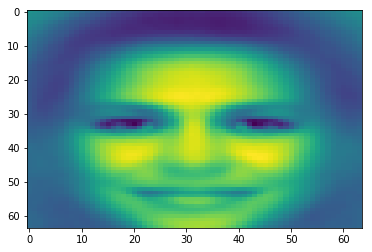

In [210]:
mean_A = np.mean(A, axis=0)
print(mean_A.shape)
plt.imshow(mean_A.reshape(64,64),aspect='auto')
plt.show()

In [212]:
reduced_mean_A = np.subtract(A,mean_A)
print(reduced_mean_A.shape)

(999, 4096)


In [213]:
u,s,ev = np.linalg.svd(reduced_mean_A.T)

(999, 999)


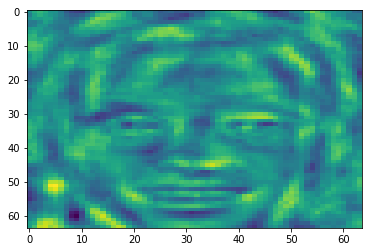

In [240]:
num = 100
print(ev.shape)
plt.imshow(u[:,num-1:num].reshape(64,64),aspect='auto')
plt.show()

In [241]:
u,s,ev = np.linalg.svd(reduced_mean_A.T, full_matrices=False)

In [242]:
u.shape

(4096, 999)

(999, 999)


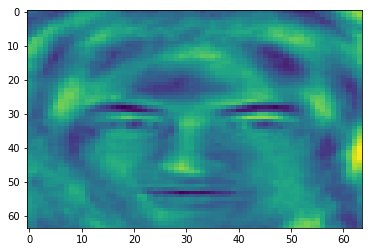

In [247]:
num = 50
print(ev.shape)
plt.imshow(u[:,num-1:num].reshape(64,64),aspect='auto')
plt.show()

In [ ]:
#####################DONE###############################################################################